## Weather API Imports

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import time
from matplotlib import cm
import datetime

# Import API key
gkey = "c7ff5c80a708d10b5d5fef2c24a7b14b"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [8]:
# list for holding lat_lngs and cities

from collections import defaultdict
lat_lng = defaultdict()

# create a set of random lat and lng combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for x in lat_lngs:
    lat, long = x #tuple unpacking
    city = citipy.nearest_city(lat, long).city_name
    lat_lng[city] = (lat, long)
    print(f'Retrieving city: {city} at :(lat, long)')

Retrieving city: ushuaia at :(lat, long)
Retrieving city: grantham at :(lat, long)
Retrieving city: busselton at :(lat, long)
Retrieving city: busselton at :(lat, long)
Retrieving city: malanje at :(lat, long)
Retrieving city: kapaa at :(lat, long)
Retrieving city: bluff at :(lat, long)
Retrieving city: new norfolk at :(lat, long)
Retrieving city: petropavlovsk-kamchatskiy at :(lat, long)
Retrieving city: planaltina at :(lat, long)
Retrieving city: bluff at :(lat, long)
Retrieving city: malanje at :(lat, long)
Retrieving city: ushuaia at :(lat, long)
Retrieving city: lolua at :(lat, long)
Retrieving city: fuerte olimpo at :(lat, long)
Retrieving city: puerto ayora at :(lat, long)
Retrieving city: airai at :(lat, long)
Retrieving city: chokurdakh at :(lat, long)
Retrieving city: olinda at :(lat, long)
Retrieving city: albany at :(lat, long)
Retrieving city: tigre at :(lat, long)
Retrieving city: zuwarah at :(lat, long)
Retrieving city: bereda at :(lat, long)
Retrieving city: tuktoyaktuk

Retrieving city: hermanus at :(lat, long)
Retrieving city: puerto ayora at :(lat, long)
Retrieving city: vaini at :(lat, long)
Retrieving city: rikitea at :(lat, long)
Retrieving city: turukhansk at :(lat, long)
Retrieving city: airai at :(lat, long)
Retrieving city: high prairie at :(lat, long)
Retrieving city: illoqqortoormiut at :(lat, long)
Retrieving city: busselton at :(lat, long)
Retrieving city: qaanaaq at :(lat, long)
Retrieving city: aden at :(lat, long)
Retrieving city: victoria at :(lat, long)
Retrieving city: bambous virieux at :(lat, long)
Retrieving city: castlerea at :(lat, long)
Retrieving city: jamestown at :(lat, long)
Retrieving city: saint george at :(lat, long)
Retrieving city: chuy at :(lat, long)
Retrieving city: ginda at :(lat, long)
Retrieving city: great bend at :(lat, long)
Retrieving city: saldanha at :(lat, long)
Retrieving city: campos belos at :(lat, long)
Retrieving city: busselton at :(lat, long)
Retrieving city: biloela at :(lat, long)
Retrieving city

Retrieving city: chuy at :(lat, long)
Retrieving city: kuandian at :(lat, long)
Retrieving city: tucuma at :(lat, long)
Retrieving city: kruisfontein at :(lat, long)
Retrieving city: vostok at :(lat, long)
Retrieving city: tuktoyaktuk at :(lat, long)
Retrieving city: nampula at :(lat, long)
Retrieving city: shaunavon at :(lat, long)
Retrieving city: jamestown at :(lat, long)
Retrieving city: broken hill at :(lat, long)
Retrieving city: piacabucu at :(lat, long)
Retrieving city: ushuaia at :(lat, long)
Retrieving city: cockburn town at :(lat, long)
Retrieving city: rikitea at :(lat, long)
Retrieving city: nadvoitsy at :(lat, long)
Retrieving city: tasiilaq at :(lat, long)
Retrieving city: bathsheba at :(lat, long)
Retrieving city: rawson at :(lat, long)
Retrieving city: kodiak at :(lat, long)
Retrieving city: ponta do sol at :(lat, long)
Retrieving city: saint-philippe at :(lat, long)
Retrieving city: tuatapere at :(lat, long)
Retrieving city: grand river south east at :(lat, long)
Retr

In [10]:
df = pd.DataFrame(list(lat_lng.items()))
df.columns = ["city", "lat_long"]
df['lat'] = df.lat_long.map(lambda x: str(x[0]))
df['lon'] = df.lat_long.map(lambda x: str(x[1]))
df.head()

,city,lat_long,lat,lon
0,ushuaia,"(-77.8781033619359, -52.28116262439197)",-77.8781033619359,-52.28116262439197
1,grantham,"(52.98870319303674, -0.70695716069676)",52.98870319303674,-0.70695716069676
2,busselton,"(-36.644998936744756, 87.67309257848274)",-36.644998936744756,87.67309257848274
3,malanje,"(-10.18903888937814, 17.473397770301204)",-10.18903888937814,17.473397770301204
4,kapaa,"(29.722581973151577, -165.19334569960017)",29.722581973151577,-165.19334569960017


In [ ]:
#Perform API calls

In [13]:
def get_current_weather(df_object):
    # Starting URL for Weather Map API Call
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'APPID' : gkey,
        'lat' : df_object.lat,
        'lon' : df_object.lon,
        'units' : 'Imperial'
    }
    data = requests.get(base_url, params=params)
    return data.json()
    time.sleep(.50)

In [18]:
sample = df.sample(n=150)
sample["weather_json"] = sample.apply(get_current_weather, axis=1)
sample["temp"] = sample.weather_json.map(lambda x: x.get('main').get('temp'))
sample.head()

,city,lat_long,lat,lon,weather_json,temp,humidity,wind_speed,cloudiness
63,jamestown,"(-52.38351759028208, -16.811374914142505)",-52.38351759028208,-16.811374914142505,"{'coord': {'lon': -16.81, 'lat': -52.38}, 'wea...",31.96,100,14.81,48
560,lakkion,"(37.081757879644684, 26.682523811323847)",37.081757879644684,26.682523811323847,"{'coord': {'lon': 26.68, 'lat': 37.08}, 'weath...",78.80,61,13.87,40
26,georgetown,"(-9.50110354762407, -22.132125197778663)",-9.50110354762407,-22.132125197778663,"{'coord': {'lon': -22.13, 'lat': -9.5}, 'weath...",77.59,100,12.91,76
478,pangnirtung,"(62.51311221410671, -64.50201063290558)",62.51311221410671,-64.50201063290558,"{'coord': {'lon': -64.5, 'lat': 62.51}, 'weath...",32.05,93,10.78,76
581,las vegas,"(34.605739929749134, -105.43348971663747)",34.605739929749134,-105.43348971663747,"{'coord': {'lon': -105.43, 'lat': 34.61}, 'wea...",69.80,28,9.17,1


In [16]:
df["weather_json"] = df.apply(get_current_weather, axis=1)

In [25]:
df["temp"] = df.weather_json.map(lambda x: x.get('main').get('temp'))
df["humidity"] = df.weather_json.map(lambda x: x.get('main').get('humidity'))
df["wind_speed"] = df.weather_json.map(lambda x: x.get('wind').get('speed'))
df["cloudiness"] = df.weather_json.map(lambda x: x.get('clouds').get('all'))
df.head()

,city,lat_long,lat,lon,weather_json,temp,humidity,wind_speed,cloudiness
0,ushuaia,"(-77.8781033619359, -52.28116262439197)",-77.8781033619359,-52.28116262439197,"{'coord': {'lon': -52.28, 'lat': -77.88}, 'wea...",-50.40,0,4.74,32
1,grantham,"(52.98870319303674, -0.70695716069676)",52.98870319303674,-0.70695716069676,"{'coord': {'lon': -0.71, 'lat': 52.99}, 'weath...",57.42,77,10.29,20
2,busselton,"(-36.644998936744756, 87.67309257848274)",-36.644998936744756,87.67309257848274,"{'coord': {'lon': 87.67, 'lat': -36.64}, 'weat...",57.43,96,14.36,92
3,malanje,"(-10.18903888937814, 17.473397770301204)",-10.18903888937814,17.473397770301204,"{'coord': {'lon': 17.47, 'lat': -10.19}, 'weat...",73.27,43,4.52,0
4,kapaa,"(29.722581973151577, -165.19334569960017)",29.722581973151577,-165.19334569960017,"{'coord': {'lon': -165.19, 'lat': 29.72}, 'wea...",74.53,97,16.04,64


In [26]:
df['lat'] = pd.to_numeric(df['lat'])
df['lon'] = pd.to_numeric(df['lon'])
type(df['lon'][0])

numpy.float64

# Temperature vs. Latitude

Text(0.5,1,'Tempurature vs. Latitude 6/29/18')

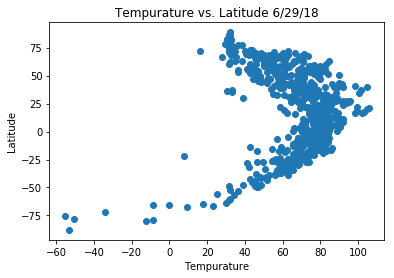

In [27]:
plt.scatter(df['temp'], df['lat'])
plt.xlabel('Tempurature')
plt.ylabel('Latitude') 
plt.title('Tempurature vs. Latitude 6/29/18')

#Humidity vs. Latitude

Text(0.5,1,'Humidity vs. Latitude 6/29/18')

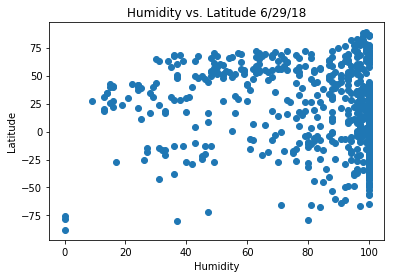

In [28]:
plt.scatter(df['humidity'], df['lat'])
plt.xlabel('Humidity')
plt.ylabel('Latitude') 
plt.title('Humidity vs. Latitude 6/29/18')

# Cloudiness vs. Latitude

Text(0.5,1,'Cloudiness vs. Latitude 6/29/18')

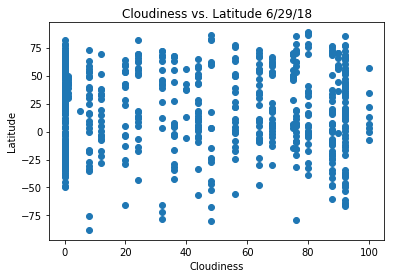

In [29]:
plt.scatter(df['cloudiness'], df['lat'])
plt.xlabel('Cloudiness')
plt.ylabel('Latitude') 
plt.title('Cloudiness vs. Latitude 6/29/18')

# Wind Speed vs. Latitude

Text(0.5,1,'Wind Speed vs. Latitude 6/29/18')

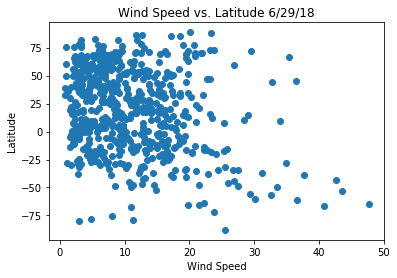

In [30]:
plt.scatter(df['wind_speed'], df['lat'])
plt.xlabel('Wind Speed')
plt.ylabel('Latitude') 
plt.title('Wind Speed vs. Latitude 6/29/18')

## Outcomes
!. Surprisingly, the closer to the equator, the higher the temperature is.
2. Wind speed does not seem to matter apparent to lattitude possible because less devices south of the equator monitoring the wind speed.
3. Humidity and latitude do not seem dependent. I imagine latitude is a more applicable independent.